In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("./features/cc_all.csv")

In [ ]:
# Adding sqrt values for each column
for col in df.iloc[:,2:].columns:
    # Make sure the column is numeric before applying sqrt
    if pd.api.types.is_numeric_dtype(df[col]):
        # df[f'{col}_sqrt'] = np.sqrt(abs(df[col]))
        # df[f'{col}_squared'] = np.square(df[col])


In [42]:
df.iloc[:,2:]

df.iloc[:,1]

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    0
19    0
20    1
21    1
22    1
Name: Result, dtype: int64

In [43]:
%store -r res
res

[14.13330815446956,
 14.081369567351956,
 14.034265054162475,
 12.926169405830962,
 12.27212198878638,
 3.230739472566894,
 5.121300394981286,
 3.5739198265668453,
 4.715887333726234,
 2.499975609761724,
 1.8052940594169544,
 5.560246204451975,
 17.144355598718082,
 25.027177715806825,
 5.118879491233692,
 22.814559268959076,
 25.719392847659723,
 2.9222363463284893,
 10.553895436793855,
 15.857470042410599,
 1.096295429346349,
 3.966428089692199]

In [44]:
from sklearn.ensemble import ExtraTreesRegressor

In [45]:
model = ExtraTreesRegressor()
model.fit(df.iloc[:,2:],df.iloc[:,1])

ExtraTreesRegressor()

In [46]:
model.feature_importances_

array([0.0100223 , 0.01569565, 0.00566007, 0.        , 0.02718511,
       0.07602111, 0.01233447, 0.01819362, 0.01557998, 0.00547753,
       0.00212963, 0.0009127 , 0.0027381 , 0.00730159, 0.01321095,
       0.10780298, 0.01006299, 0.00663605, 0.00156463, 0.00610507,
       0.02302489, 0.00586735, 0.00925871, 0.00339002, 0.00253527,
       0.0205614 , 0.02860917, 0.06292027, 0.07224814, 0.02464207,
       0.01737545, 0.01237503, 0.01935803, 0.01968144, 0.00887541,
       0.00437713, 0.00162547, 0.0009127 , 0.00121693, 0.00612812,
       0.00628748, 0.00272427, 0.0027381 , 0.00623677, 0.00978704,
       0.00827513, 0.01625907, 0.11346807, 0.12173609, 0.01781274,
       0.00505777])

In [47]:
df.iloc[:,2:].columns

Index(['Pol_C', 'Pol_A', 'RadV_C', 'RadV_A', 'CN_C', 'CN_A', 'Ion_C', 'Ion_A',
       'EA_C', 'f1', 'f2', 'f3', 'f4', 'R_C', 'R_A', 'EN_C', 'EN_A',
       'Pol_C_sqrt', 'Pol_C_squared', 'Pol_A_sqrt', 'Pol_A_squared',
       'RadV_C_sqrt', 'RadV_C_squared', 'RadV_A_sqrt', 'RadV_A_squared',
       'CN_C_sqrt', 'CN_C_squared', 'CN_A_sqrt', 'CN_A_squared', 'Ion_C_sqrt',
       'Ion_C_squared', 'Ion_A_sqrt', 'Ion_A_squared', 'EA_C_sqrt',
       'EA_C_squared', 'f1_sqrt', 'f1_squared', 'f2_sqrt', 'f2_squared',
       'f3_sqrt', 'f3_squared', 'f4_sqrt', 'f4_squared', 'R_C_sqrt',
       'R_C_squared', 'R_A_sqrt', 'R_A_squared', 'EN_C_sqrt', 'EN_C_squared',
       'EN_A_sqrt', 'EN_A_squared'],
      dtype='object')

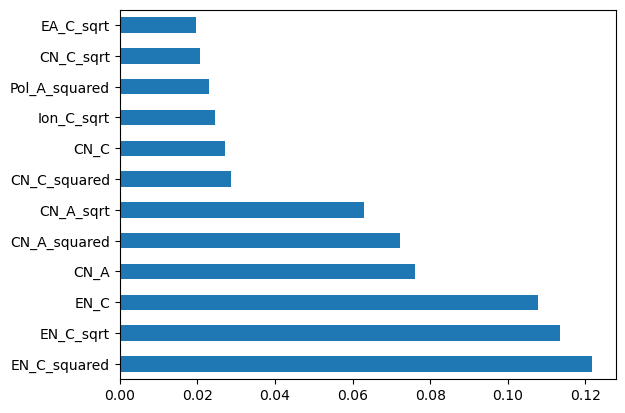

In [48]:
# plot the feature importances
feat_importances = pd.Series(model.feature_importances_, index=df.iloc[:,2:].columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()